# Exploration of Loan Data from Prosper
## by Hyoson Yamanaka

## Preliminary Wrangling

> The dataset in this report contains 113,937 loans from the Prosper marketplace. It provides borrower and loan characteristics with 81 variables such as loan amount, interest rate, loan status, borrower income, employment status, credit history, etc.

> Prosper is a US-based peer-to-peer lending marketplace. Borrowers can request personal loans on Prosper and individual or institutional investors can fund anywhere from 2,000 to 35,000 USD per loan request. Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan. Prosper handles the servicing of the loan and collects and distributes borrower payments and interest back to the loan investors.
Source: https://en.wikipedia.org/wiki/Prosper_Marketplace

> Data source: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv

> Explanation of the variables included in the dataset: 
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

plt.style.use('ggplot')

In [2]:
# If data needs to be gathered first:
## import requests

# Downloading the image predictions file
## url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
## response = requests.get(url)

## with open('prosperLoanData.csv', mode='wb') as file:    
##         file.write(response.content)

In [3]:
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# allow for more columns and rows to be displayed
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

# Overview of dataframe structure
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# See summary statistics for the variables
df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
# Check for any duplicated rows of data
sum(df.duplicated())

0

**Assessing and Cleaning the Dataset**

- Many of the provided variables are not of interest for the final analysis. For now they will remain in the dataframe in order to enable future analysis.

- There are many variables with a significant amount of Null values. These observations will also remain in the dataset as they offer information on other variables and _no data_ can also give insights on the loan or borrower performance. (For example: Maybe borrowers with no information on their employment status default more frequently)

- Listing creation data will be transformed to datetime type in order to facilitate easier analysis with dates.

- Replace Income Range values: change _Non-employed_ to _0_ USD and _Not displayed_ to _ND_ (no data).

- Create a default flag variable that shows if a loan is/has been delinquent for 90+ days.

In [9]:
# Copy of original dataframe for cleaning steps
df_clean = df.copy()

In [10]:
# DateTime

# Convert listingcreationdate to datetime format
df_clean['ListingCreationDate'] = pd.to_datetime(df_clean['ListingCreationDate'], errors='coerce', yearfirst=True)

In [11]:
# Test
df_clean['ListingCreationDate'].dtype

dtype('<M8[ns]')

In [12]:
# Defaults

# Define a default if the loan has been delinquent for 90 days or more
# the standard guideline used in most financial markets.
df_clean['DefaultFlag'] = df_clean['LoanCurrentDaysDelinquent'] >= 90

In [13]:
# Test
df_clean[['LoanCurrentDaysDelinquent', 'DefaultFlag']].sample(10)

,LoanCurrentDaysDelinquent,DefaultFlag
90866,0,False
17004,1644,True
54719,0,False
71217,0,False
44588,0,False
16160,0,False
10556,0,False
53577,0,False
104384,335,True
17855,0,False


In [14]:
# Income Ranges

# Replace Non-employed with 0 USD and Not displayed to ND.
df_clean['IncomeRange'] = df_clean['IncomeRange'].replace('Not employed', '$0')
df_clean['IncomeRange'] = df_clean['IncomeRange'].replace('Not displayed', 'ND')

In [15]:
# Test
df_clean['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'ND', '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

### What is the structure of your dataset?

> The dataset has information on 113,937 loans and provides 81 attributes. For each loan we get information on the borrower and loan characteristics. 
[...]

### What is/are the main feature(s) of interest in your dataset?

> The borrower and loan characteristics for defaulted loans will be primarily analyzed in this study. The goal is to see if there are observable differences between the borrowers that defaulted and the ones that didn't. [...]

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Prosper rating, Prosper score, occupation, DebtToIncomeRatio, IncomeRange, LoanCurrentDaysDelinquent, LoanOriginationDate [...]

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

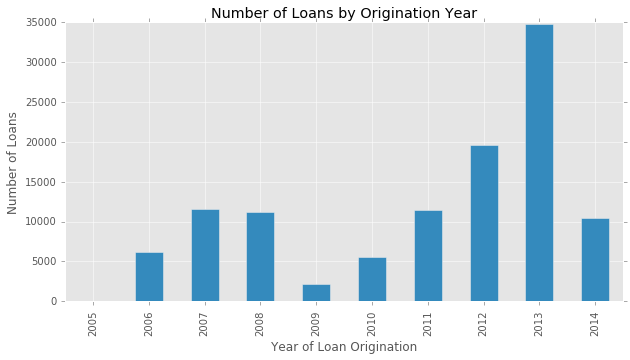

In [16]:
# Period coverage of data
coverage = df_clean.groupby(df_clean['ListingCreationDate'].dt.year)['ListingNumber'].nunique()

# Bar chart
color = sb.color_palette()[1]

plt.figure(figsize=(10, 5))
coverage.plot(kind='bar', color=color);

plt.title('Number of Loans by Origination Year');
plt.xlabel('Year of Loan Origination');
plt.ylabel('Number of Loans');

**Loans by Origination Year**
- The highest amount of loans by year of origination / listing in the dataset are from 2012-2013.
- During 2009/10 the loan amount is significantly lower than the other years, suggesting a major impact of the financial crisis at the time on the volume of loans.


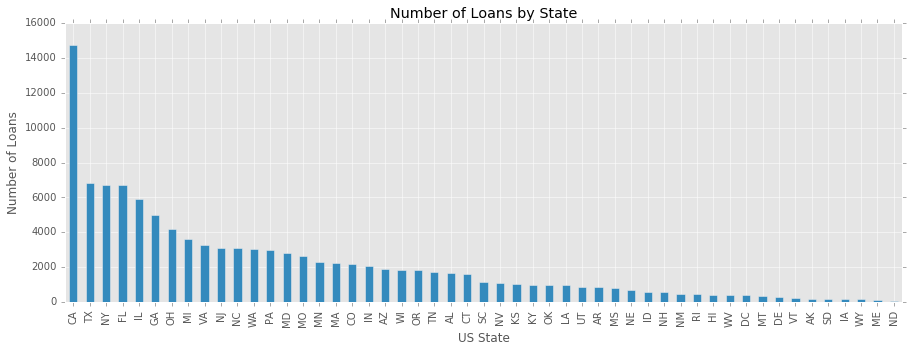

In [17]:
# Loans per regions/state
states = df_clean['BorrowerState'].value_counts()

# Bar chart
plt.figure(figsize=(15, 5))
states.plot(kind='bar', color=color);

plt.title('Number of Loans by State');
plt.xlabel('US State');
plt.ylabel('Number of Loans');

**Loans by State**
- California shows the largest number of loans by a siginifcant margin, with over 14,000 loans in the dataset coming from the state. The next three largest markets are Texas, New York and Florida, with less than half that number.
- This strong regional concentration is probably driven by the fact that Propser is a California-based operation, focusing on their "home-turf" to some degree.
- The market sizes can also be explained by the US population distribution, which roughly shows a similar ranking of the largest states.


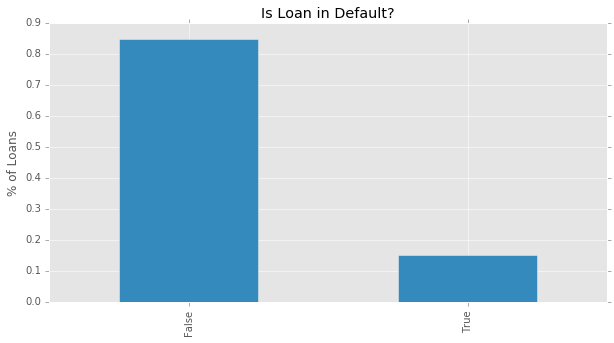

In [18]:
# Defaulted loans
# Percentage of loans in default
defaults = df_clean['DefaultFlag'].value_counts() / df_clean['DefaultFlag'].shape[0]

# Bar chart
plt.figure(figsize=(10, 5))
defaults.plot(kind='bar', color=color);

plt.title('Is Loan in Default?');
plt.ylabel('% of Loans');


**Defaulted Loans**
- Roughly 15% of loans in the dataset were/are in default when using the default definition of 90+ days in delinquencies. That is quite a high rate and warrants a closer look at what type of loans/borrowers are defaulting.

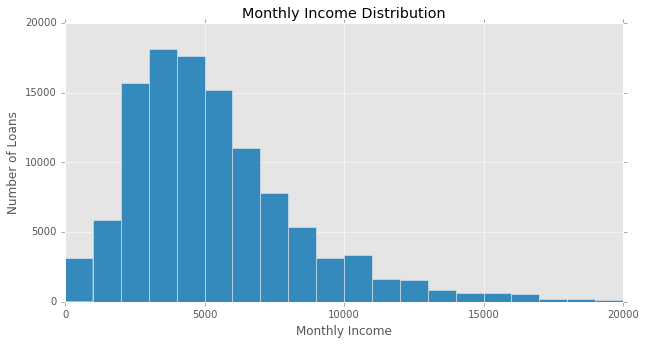

In [38]:
# Bar chart
plt.figure(figsize=(10, 5))

bin_edges = np.arange(0, df_clean['StatedMonthlyIncome'].max()+1000, 1000);

df_clean['StatedMonthlyIncome'].hist(bins = bin_edges, color=color);

plt.title('Monthly Income Distribution');
plt.xlabel('Monthly Income');
plt.ylabel('Number of Loans');
plt.xlim(0, 20000);

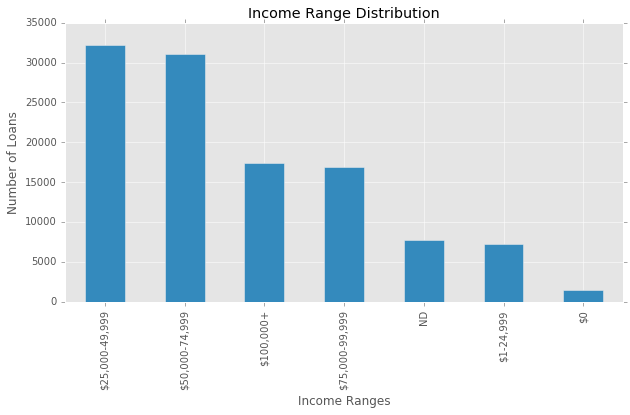

In [14]:
# Income ranges of the borrowers
income = df_clean['IncomeRange'].value_counts()

# Bar chart
plt.figure(figsize=(10, 5))
income.plot(kind='bar', color=color);

plt.title('Income Range Distribution');
plt.xlabel('Income Ranges');
plt.ylabel('Number of Loans');

**Income Ranges**
- Most borrowers have incomes between 25,000 to 75,000 USD. This is reflected both in the monthly income or in the income range column.
- There are some borrowers that don't report incomes and very few that are not epmloyed or have 0 USD reported income. Are these the ones more likely to be in the defaulted category?

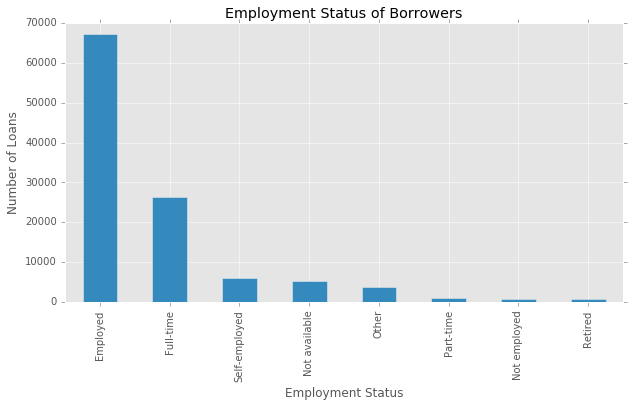

In [15]:
# Employment Status
employment = df_clean['EmploymentStatus'].value_counts()

# Bar chart
plt.figure(figsize=(10, 5))
employment.plot(kind='bar', color = color);

plt.title('Employment Status of Borrowers');
plt.xlabel('Employment Status');
plt.ylabel('Number of Loans');

**Employment Status**
- Most borrowers are reported as being employed or full-time working. 

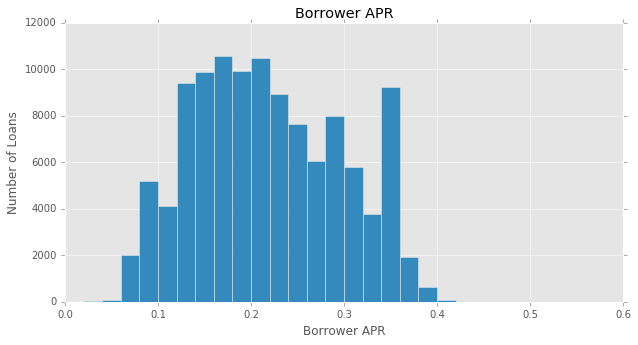

In [63]:
# Borrower APR
plt.figure(figsize=(10, 5))
bin_edges = np.arange(0, df_clean['BorrowerAPR'].max()+0.02, 0.02);
df_clean['BorrowerAPR'].hist(bins = bin_edges, color = color);

plt.title('Borrower APR');
plt.xlabel('Borrower APR');
plt.ylabel('Number of Loans');

**Borrower APR**
- Almost all borrowers pay an annual interest rate of 10 - 40%, with the majority concentrated around 20%.
- There is a large group of loans paying roughly 36% APR for some reason. This could be investigated in a future analysis.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most variables (origination year, income range, state, employment status) showed a concentration around one or two characteristics. The monthly income column had some extreme outliers which where ignored in the chart by limiting the X-axis range.

> As there were no extreme points in the variables observed, no transaformations were necessary.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions were all skewed towards a few characteristics. The majority of borrowers shows "normal" values, such as being employed and having an average income level.

> Adjustments to the data were only made in the cleaning phase. The listing date was transformed to the datetime format in order to extract the year value easily for the origination year chart. The income range categories were cleaned up a bit to reflect which borrowers have 0 USD income. Lastly, a default category was created based on the 90+ days in delinquency definition so that the underlying default flag is made clear.

## Bivariate Exploration


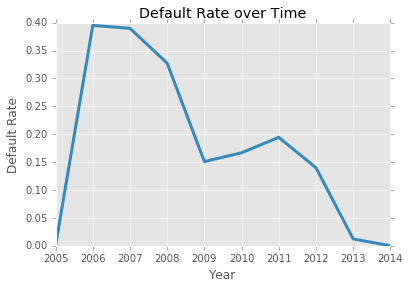

In [78]:
# Default rate over time

# Default rate by year
defaulted_loans = df_clean.groupby(df_clean['ListingCreationDate'].dt.year)['DefaultFlag'].sum();
performing_loans = df_clean.groupby(df_clean['ListingCreationDate'].dt.year)['ListingNumber'].count();

def_year = defaulted_loans / performing_loans;
def_year = def_year.reset_index();
def_year['ListingCreationDate'] = def_year['ListingCreationDate'].astype('str');

# Chart
plt.figure(figsize=(10, 5));
def_year.plot.line(x = 'ListingCreationDate', y = 0, color = color, lw=3, legend=False);

plt.xlabel('Year');
plt.ylabel('Default Rate');
plt.title('Default Rate over Time');

**Default Rate over Time**
- The default rate is defined as defaulted loans divided by all loans in a given year.
- The default rate is highest for loans originated between 2006 - 2008, peaking at 40%. This means that almost half of all borrowers from 2006 and 2007 did not repay their loans (full or partially).

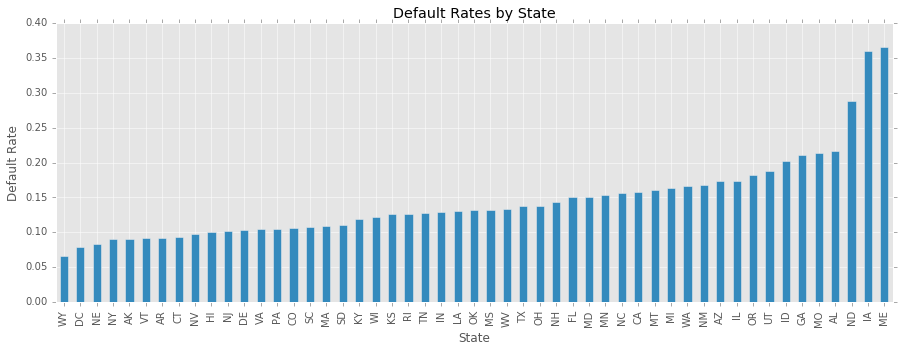

In [93]:
# Default rate by state
defaulted_loans = df_clean.groupby('BorrowerState')['DefaultFlag'].sum();
performing_loans = df_clean.groupby('BorrowerState')['ListingNumber'].count();

def_state = defaulted_loans / performing_loans
def_state.sort_values(inplace=True)

# Chart
plt.figure(figsize=(15, 5));
def_state.plot(kind = 'bar', color = color);

plt.xlabel('State');
plt.ylabel('Default Rate');
plt.title('Default Rates by State');

**Default Rates by States**
- The default rates vary quite significantly by state. The lowest rate is recorded in WY at around 6%. The highest default rates are observed in IA and ME, both above 35%.
- The states with highest loan amount (see previous section) are not particularily visible in this ranking.

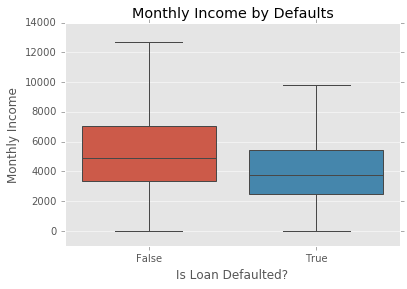

In [45]:
# Defaults by income
sb.boxplot(data = df_clean, x = 'DefaultFlag', y = 'StatedMonthlyIncome', showfliers=False);

plt.title('Monthly Income by Defaults');
plt.xlabel('Is Loan Defaulted?');
plt.ylabel('Monthly Income');

plt.ylim(-1000, 14000);

**Monthly Income by Default Status**
- For this chart the outliers of the Boxplot where ignored to make the visual more appealing and because the outliers do not inform us about the "average" case or trends we are interestd in.
- The borrowers' monthly income is generally lower for loans that defaulted. This is the case for the maximum values and quartile ranges.
- This is already a interesting hint at the importance of the income on the default behavior.

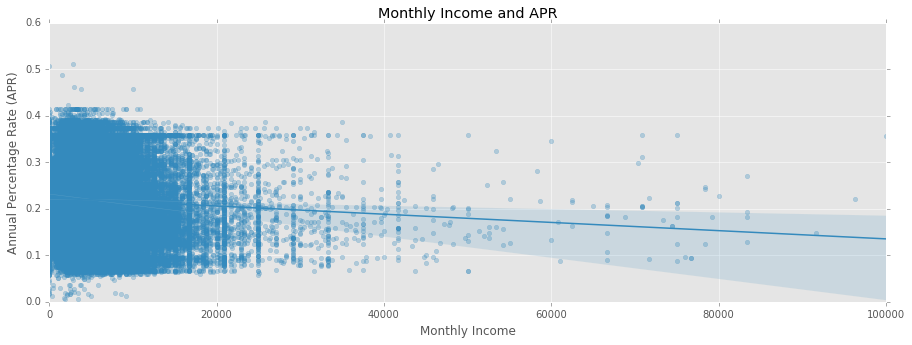

In [99]:
# APR and income
plt.figure(figsize=(15, 5));
sb.regplot(data = df_clean, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', 
           color = color, scatter_kws={'alpha':0.3});
plt.xlim(0, 100000);
plt.ylim(0, 0.6);

plt.xlabel('Monthly Income');
plt.ylabel('Annual Percentage Rate (APR)');
plt.title('Monthly Income and APR');

**Income and Borrower APR**
- The income seems not to be the determining factor of the final level of interest payed. A slight downward trend is suggested by the regression line, but the amount of observations for high income individuals is quite low in comparison the the sub 20,000 USD monthly income categories.

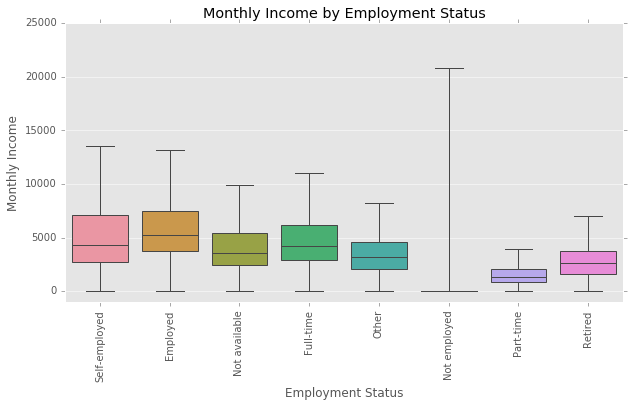

In [100]:
# Employment status and monthly income
plt.figure(figsize=(10, 5));
sb.boxplot(data = df_clean, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', showfliers=False);

plt.title('Monthly Income by Employment Status');
plt.xlabel('Employment Status');
plt.ylabel('Monthly Income');

plt.ylim(-1000, 25000)
plt.xticks(rotation=90);

**Monthly Income by Employment Status**
- For this chart the outliers of the Boxplot where ignored to make the visual more appealing and because the outliers do not inform us about the "average" case or trends we are interestd in.
- Employed and self-employed borrowers have the highest monthly incomes, based on the inner quartile distribution.
- The lowest monthly incomes are recorded for the part-time, retired and other categories.
- Not employed shows the widest gap between the minimum and maximum values, but there are also not many observations in this category, so we should treat it carefully.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The default rate varied quite significantly over the years with clear peaks during the financial crisis. It does matter when a loan was originated.

> Certain states show a significantly higher default rate than others, suggesting that the regional characteristics are important.

> The monthly income for defaulted borrowers is generally lower than that for performing loans, based on the distribution characteristics. In a very simplistic way, one could conclude that poorer borrowers are also more likely to default on their loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The monthly income does not seem to matter too much for the APR, i.e. the interest the borrower has to pay on the loan. 

> Overall, employed and self-employed borrowers show the highest income levels.

## Multivariate Exploration

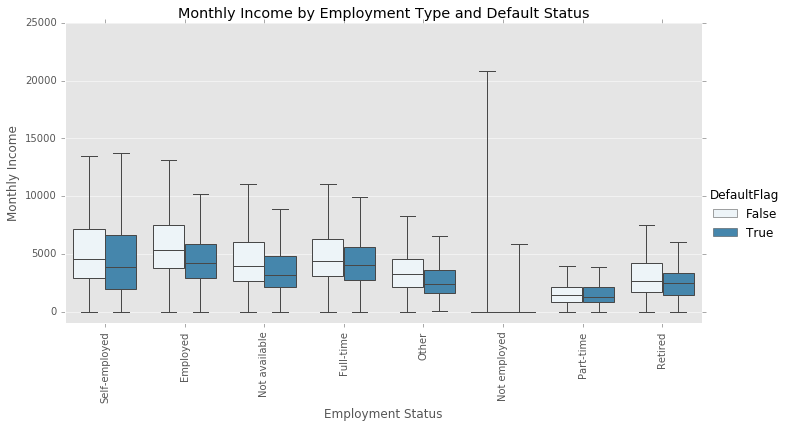

In [43]:
# Monthly income by employment type and defaults
sb.catplot(data = df_clean, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', 
           hue = 'DefaultFlag', kind="box", showfliers=False, height=5, aspect=2, color = color)

plt.ylim(-1000, 25000)
plt.xticks(rotation=90);
plt.title('Monthly Income by Employment Type and Default Status')
plt.xlabel('Employment Status')
plt.ylabel('Monthly Income');

**Monthly Income by Employment Status and Default Status**
- For this chart the outliers of the Boxplot where ignored to make the visual more appealing and because the outliers do not inform us about the "average" case or trends we are interestd in.
- Comparing the overall distribution of monthly incomes by employment type, it becomes clear that defaulted borrowers show lower income levels across almost all employment types. The only exception are part-time workers: for this group the income distribution looks to be fairly similar based on the quartile ranges.

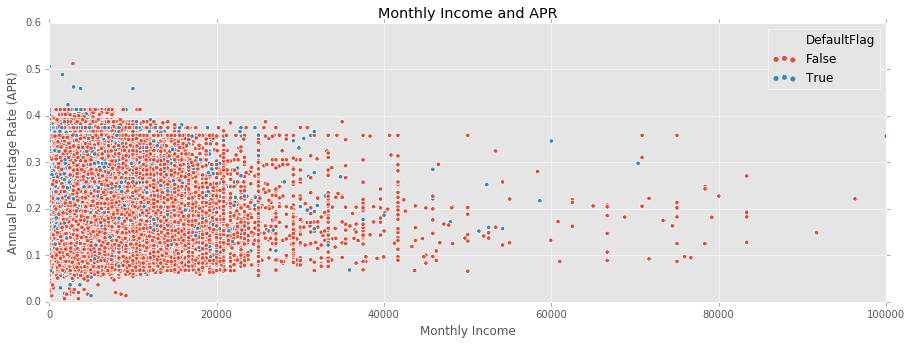

In [42]:
# APR and income and defaults
plt.figure(figsize=(15, 5));
sb.scatterplot(data = df_clean, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', 
           color = color,  hue = 'DefaultFlag');
plt.xlim(0, 100000);
plt.ylim(0, 0.6);

plt.xlabel('Monthly Income');
plt.ylabel('Annual Percentage Rate (APR)');
plt.title('Monthly Income and APR');

**APR vs Income with Default Flag**
- No obvious relationship or concentration of defaults can be gathered from this chart.

In [50]:
defaulted_loans = df_clean.groupby(['BorrowerState', df_clean['ListingCreationDate'].dt.year])['DefaultFlag'].sum();
performing_loans = df_clean.groupby(['BorrowerState', df_clean['ListingCreationDate'].dt.year])['ListingNumber'].count();

def_state = defaulted_loans / performing_loans
def_state.reset_index()

,BorrowerState,ListingCreationDate,0
0,AK,2006,0.000000
1,AK,2007,0.153846
2,AK,2008,0.222222
3,AK,2009,0.000000
4,AK,2010,0.181818
5,AK,2011,0.120000
6,AK,2012,0.146341
7,AK,2013,0.015385
8,AK,2014,0.000000
9,AL,2006,0.653846


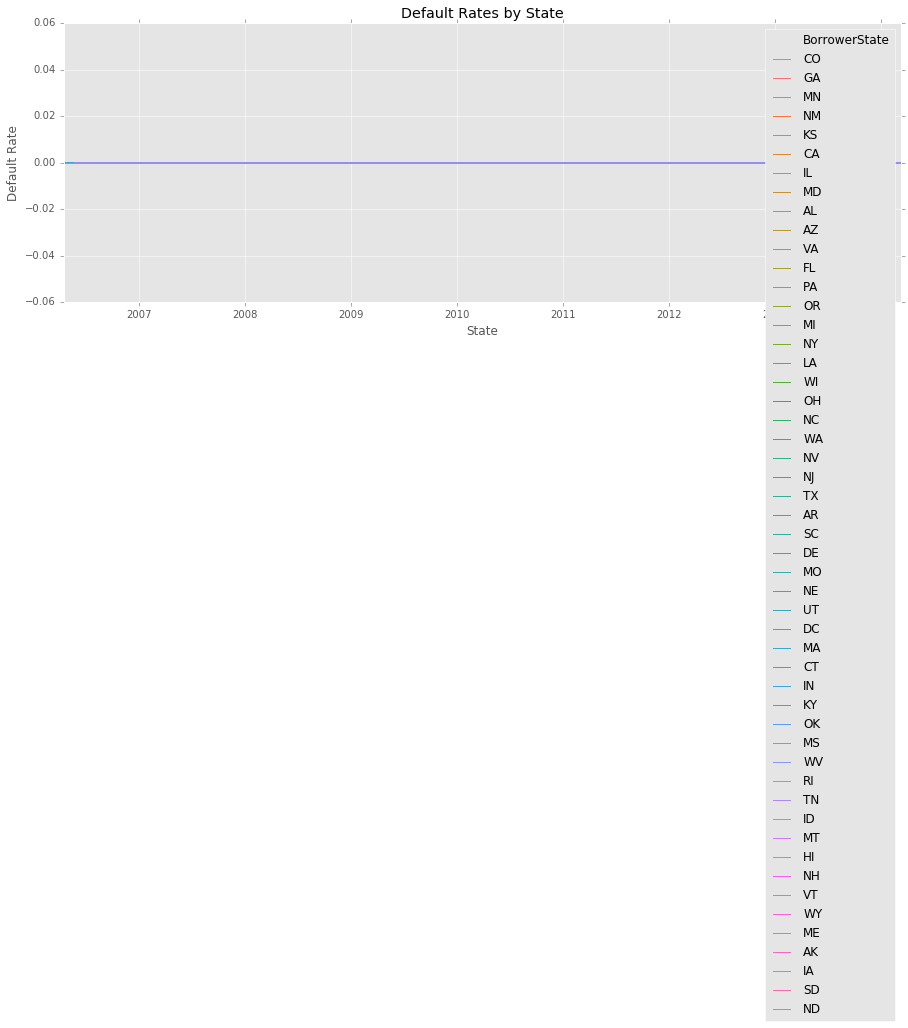

In [54]:
# Default rate by states over time
defaulted_loans = df_clean.groupby(['BorrowerState', df_clean['ListingCreationDate'].dt.year])['DefaultFlag'].sum();
performing_loans = df_clean.groupby(['BorrowerState', df_clean['ListingCreationDate'].dt.year])['ListingNumber'].count();

def_state_year = defaulted_loans / performing_loans
def_state_year = def_state.reset_index()

# Chart
plt.figure(figsize=(15, 5));
sb.lineplot(data = df_clean, x = 'ListingCreationDate', y = 0, hue = 'BorrowerState')

plt.xlabel('State');
plt.ylabel('Default Rate');
plt.title('Default Rates by State');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!